## Integrantes
- Brayan Estiven Salcedo Suarez 202022731
- Daniel Felipe Ortiz Vallejo 202221234
- Julian David Parra Forero 202013033

En la era digital, la desinformación se ha convertido en un problema crítico, ya que la difusión de noticias falsas puede influir en la opinión pública, generar confusión y afectar la toma de decisiones. Para abordar este desafío, este trabajo propone la implementación de un sistema basado en aprendizaje automático para la detección automática de noticias falsas.  

El objetivo principal es desarrollar un modelo que, a partir del análisis de noticias previas, pueda predecir si una nueva noticia es confiable o no. Para ello, se aplicarán técnicas de **procesamiento de lenguaje natural (NLP)** y algoritmos de **aprendizaje supervisado** que permitirán identificar patrones lingüísticos, semánticos y estructurales en los textos.  

Este estudio no solo busca mejorar la precisión en la detección de noticias falsas, sino también proporcionar una herramienta útil para medios de comunicación, verificadores de información y usuarios en general, ayudando a combatir la desinformación en entornos digitales.

## **Descripción del Dataset**  

El dataset utilizado en este trabajo fue entregado por bloque neon y contiene una recopilación de noticias etiquetadas como verdaderas o falsas. Su estructura está diseñada para capturar información clave sobre cada noticia, permitiendo el análisis de su contenido y la identificación de patrones que diferencien noticias reales de noticias falsas.  

Las principales columnas del dataset son:  

- **ID**: Un identificador único para cada noticia en el dataset.  
- **Label**: Indica si la noticia es real (`1`) o falsa (`0`), lo que servirá como referencia para entrenar el modelo de detección.  
- **Título**: El encabezado de la noticia, que usualmente resume su contenido en pocas palabras.  
- **Descripción**: Un resumen breve de la noticia que proporciona más contexto sobre el título.  
- **Fecha**: La fecha en que la noticia fue publicada, lo que permite analizar tendencias a lo largo del tiempo.  

Ejemplo de registros en el dataset:  

| ID  | Label | Título | Descripción | Fecha |
|-----|-------|------------------------------------------------|------------------------------------------------------------------------------------------------|------------|
| 1   | 1     | 'The Guardian' va con Sánchez: 'Europa necesita que su apuesta dé sus frutos' | El diario británico publicó un editorial sobre las elecciones del 23J, calificando de valiente el adelanto electoral y alertando sobre los riesgos de la ultraderecha. | 02/06/2023 |
| 2   | 0     | REVELAN QUE EL GOBIERNO NEGOCIÓ LA LIBERACIÓN DE MIRELES A CAMBIO DE OTORGARLE EL PERDÓN A JAVIER DUARTE | Supuestas negociaciones entre el gobierno y Javier Duarte en el marco de la liberación de José Manuel Mireles. | N/A |






## Instalación de librerias

In [1]:
!pip install nltk
!pip install contractions
!pip install inflect
!pip install scikit-plot
!pip install spacy
!pip install stanza
!pip install xgboost

You should consider upgrading via the 'C:\Users\Julian\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Julian\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'C:\Users\Julian\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Julian\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Julian\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Julian\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Julian\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Julian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Julian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Julian\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# Instalación de librerias
import pandas as pd
import numpy as np
import sys
!{sys.executable} -m pip install pandas-profiling

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, SnowballStemmer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt

You should consider upgrading via the 'c:\Users\Julian\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


## Perfilamiento y entendimiento de datos

In [6]:
import pandas as pd

df = pd.read_csv("fake_news_spanish.csv", sep=";",encoding="utf-8" )
df_t=df

In [7]:
df_t

,ID,Label,Titulo,Descripcion,Fecha
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018
...,...,...,...,...,...
57058,ID,1,El Defensor del Pueblo reclama a la Comunidad ...,El gobierno regional han indicado que la atenc...,08/06/2021
57059,ID,0,El EQUO plantea ceder la presidencia de la Com...,Si la higiene democrática nos lleva a esa exig...,08/09/2020
57060,ID,1,Alberto Garzón: 'Que los Borbones son unos lad...,El coordinador federal de IU asegura que la mo...,12/07/2018
57061,ID,1,Vox exige entrar en el Gobierno de Castilla y ...,Santiago Abascal: Vox tiene el derecho y el de...,13/02/2022


In [8]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57063 entries, 0 to 57062
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           57063 non-null  object
 1   Label        57063 non-null  int64 
 2   Titulo       57047 non-null  object
 3   Descripcion  57063 non-null  object
 4   Fecha        57063 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.2+ MB


## Entendimiento de de los datos

Se realizó un perfilamiento inicial del dataset para comprender su estructura y calidad de datos, incluyendo la identificación de dimensiones, tipos de datos, valores nulos, filas duplicadas y la distribución de la variable objetivo. Se corrigió un error relacionado con datos de tipo lista al convertir todas las columnas a string, lo que permitió ejecutar correctamente la detección de duplicados. Este análisis es clave para garantizar que los datos estén en un formato adecuado antes de cualquier procesamiento o modelado.

In [9]:
df = df.astype(str)

# a. Dimensiones del dataset
print("Dimensiones del dataset (filas, columnas):", df.shape)

# b. Tipos de datos de cada columna
print("\nTipos de datos de cada columna:\n", df.dtypes)

# c. Cantidad de valores nulos por columna
print("\nValores nulos por columna:\n", df.isnull().sum())

# d. Cantidad de filas duplicadas
duplicados = df.duplicated().sum()
print("\nCantidad de filas duplicadas:", duplicados)

# e. Distribución de la variable objetivo (si existe una columna 'label')
if "label" in df.columns:
    print("\nDistribución de clases en la variable objetivo:\n", df["label"].value_counts())

Dimensiones del dataset (filas, columnas): (57063, 5)

Tipos de datos de cada columna:
 ID             object
Label          object
Titulo         object
Descripcion    object
Fecha          object
dtype: object

Valores nulos por columna:
 ID             0
Label          0
Titulo         0
Descripcion    0
Fecha          0
dtype: int64

Cantidad de filas duplicadas: 445


El análisis del dataset muestra que contiene **57,063 filas y 8 columnas**, lo que indica un volumen considerable de datos. **Todos los atributos han sido convertidos a tipo "object" (string)** para evitar errores en la detección de duplicados. Se observa que **no hay valores nulos** en ninguna columna, lo que sugiere que el dataset está completo en términos de datos registrados. Sin embargo, se identificaron **445 filas duplicadas**, lo que podría afectar el análisis y requerir una limpieza adicional.

Adicionalmente se presenta un grafico con la distribución de clases

C:\Users\Julian\AppData\Local\Temp\ipykernel_9876\4292955707.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


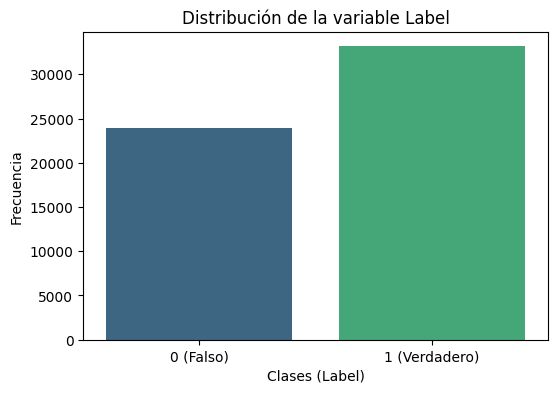

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna Label a tipo numérico (por si hay valores como strings)
df["Label"] = pd.to_numeric(df["Label"], errors="coerce")

# Contar la frecuencia de cada clase (0 y 1)
label_counts = df["Label"].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.xlabel("Clases (Label)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la variable Label")
plt.xticks([0, 1], ["0 (Falso)", "1 (Verdadero)"])  # Etiquetas personalizadas
plt.show()


In [11]:
import pandas as pd
from scipy import stats as st

# Copia del dataset original para evitar modificarlo directamente
textos = df_t.copy()

# Longitud total del mensaje en caracteres
textos['Conteo'] = textos['Descripcion'].apply(len)

# Longitud de la palabra más larga en cada mensaje
textos['Max'] = textos['Descripcion'].apply(lambda x: max(map(len, x.split())))

# Longitud de la palabra más corta en cada mensaje
textos['Min'] = textos['Descripcion'].apply(lambda x: min(map(len, x.split())))

# Moda de la longitud de palabras en cada mensaje
#textos['Moda'] = textos['Descripcion'].apply(lambda x: st.mode([len(p) for p in x.split()])[0][0])

# Mostrar resultados
print(textos.head())

   ID  Label                                             Titulo  \
0  ID      1  'The Guardian' va con Sánchez: 'Europa necesit...   
1  ID      0  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...   
2  ID      1  El 'Ahora o nunca' de Joan Fuster sobre el est...   
3  ID      1  Iglesias alienta a Yolanda Díaz, ERC y EH Bild...   
4  ID      0  Puigdemont: 'No sería ninguna tragedia una rep...   

                                         Descripcion       Fecha  Conteo  Max  \
0  El diario británico publicó este pasado jueves...  02/06/2023     218   13   
1  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...  01/10/2023    3251   14   
2  El valencianismo convoca en Castelló su fiesta...  25/04/2022     169   13   
3  En política, igual que hay que negociar con lo...  03/01/2022     133   15   
4  En una entrevista en El Punt Avui, el líder de...  09/03/2018     242   14   

   Min  
0    1  
1    1  
2    2  
3    2  
4    1  


In [12]:
textos

,ID,Label,Titulo,Descripcion,Fecha,Conteo,Max,Min
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023,218,13,1
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023,3251,14,1
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022,169,13,2
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022,133,15,2
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018,242,14,1
...,...,...,...,...,...,...,...,...
57058,ID,1,El Defensor del Pueblo reclama a la Comunidad ...,El gobierno regional han indicado que la atenc...,08/06/2021,244,12,1
57059,ID,0,El EQUO plantea ceder la presidencia de la Com...,Si la higiene democrática nos lleva a esa exig...,08/09/2020,314,11,1
57060,ID,1,Alberto Garzón: 'Que los Borbones son unos lad...,El coordinador federal de IU asegura que la mo...,12/07/2018,70,11,2
57061,ID,1,Vox exige entrar en el Gobierno de Castilla y ...,Santiago Abascal: Vox tiene el derecho y el de...,13/02/2022,232,12,1


## Preparación de los datos
Para poder realizar el pre-procesamiento de los datos, se debe pasar por:
- Limpieza de los datos
- Tokenización de los datos
- normalización de los datos

### Limpieza de los datos

Se debe dejar el archivo csv en un texto plano, también se elimina caracteres especiales y se pasa todo a minúsculas

In [13]:
def remove_non_ascii(words):
    new_words = []
    for word in words:
        if word is not None:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
    return new_words

def to_lowercase(words):
    new_words = []
    for word in words:
        if word is not None:
            new_word = word.lower()
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_punctuation(words):
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in stopwords.words('spanish'):
            new_words.append(word)
    return new_words

def processing(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    return words

## Tokenización

La tokenización es el proceso de dividir un texto en palabras individuales. Pero antes se realiza una correción de las contraciones que pueden aparecer en el texto.

In [14]:
df_t['Descripcion'] = df_t['Descripcion'].apply(contractions.fix)

In [15]:
nltk.download('punkt_tab')
df_t['words'] = df_t['Descripcion'].apply(word_tokenize)
df_t.head()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Julian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,ID,Label,Titulo,Descripcion,Fecha,words
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023,"[El, diario, británico, publicó, este, pasado,..."
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023,"[REVELAN, QUE, EL, GOBIERNO, NEGOCIO, LA, LIBE..."
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022,"[El, valencianismo, convoca, en, Castelló, su,..."
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022,"[En, política, ,, igual, que, hay, que, negoci..."
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018,"[En, una, entrevista, en, El, Punt, Avui, ,, e..."


In [16]:
df_t['words'].dropna()

0        [El, diario, británico, publicó, este, pasado,...
1        [REVELAN, QUE, EL, GOBIERNO, NEGOCIO, LA, LIBE...
2        [El, valencianismo, convoca, en, Castelló, su,...
3        [En, política, ,, igual, que, hay, que, negoci...
4        [En, una, entrevista, en, El, Punt, Avui, ,, e...
                               ...                        
57058    [El, gobierno, regional, han, indicado, que, l...
57059    [Si, la, higiene, democrática, nos, lleva, a, ...
57060    [El, coordinador, federal, de, IU, asegura, qu...
57061    [Santiago, Abascal, :, Vox, tiene, el, derecho...
57062    [Los, Mossos, dEsquadra, han, blindado, los, a...
Name: words, Length: 57063, dtype: object

In [17]:
df_t.shape

(57063, 6)

In [18]:
df_t['words'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 57063 entries, 0 to 57062
Series name: words
Non-Null Count  Dtype 
--------------  ----- 
57063 non-null  object
dtypes: object(1)
memory usage: 445.9+ KB


In [19]:
#aplica la limpieza de datos hecho anteriormente
df_t['words1']= df_t['words'].apply(processing)
df_t.head()

,ID,Label,Titulo,Descripcion,Fecha,words,words1
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023,"[El, diario, británico, publicó, este, pasado,...","[diario, britanico, publico, pasado, jueves, e..."
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023,"[REVELAN, QUE, EL, GOBIERNO, NEGOCIO, LA, LIBE...","[revelan, gobierno, negocio, liberacion, mirel..."
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022,"[El, valencianismo, convoca, en, Castelló, su,...","[valencianismo, convoca, castello, fiesta, gra..."
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022,"[En, política, ,, igual, que, hay, que, negoci...","[politica, igual, negociar, empresarios, negoc..."
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018,"[En, una, entrevista, en, El, Punt, Avui, ,, e...","[entrevista, punt, avui, lider, jxcat, desdram..."


## Normalización
 En esta etapa se elimina los prefijos y los sufijos de las palabras, para que las palabras se puedan comparar de manera más efectiva.

In [20]:
import stanza
from nltk.stem import SnowballStemmer
from tqdm import tqdm
import pandas as pd
import json
import os

# Descargar el modelo de Stanza para español (solo la primera vez)
stanza.download("es")

# Inicializar el pipeline de Stanza
nlp_stanza = stanza.Pipeline("es", processors="tokenize,mwt,pos,lemma")

# Inicializar el stemmer de NLTK
stemmer = SnowballStemmer("spanish")

# Función para aplicar stemming a una lista de palabras
def stem_words(words):
    return [stemmer.stem(word) for word in words]

# Función para lematizar una lista de textos
def lemmatize_text(texts):
    lemmatized_texts = []
    for text in tqdm(texts, desc="Lematizando textos"):
        doc = nlp_stanza(text)
        lemmatized_texts.append([word.lemma for sentence in doc.sentences for word in sentence.words])
    return lemmatized_texts

# Función para aplicar stemming y lematización a una lista de listas de palabras
def stem_and_lemmatize(words_list):
    texts = [" ".join(words) for words in words_list]  # Convertir listas de palabras en texto
    stems = [stem_words(words) for words in tqdm(words_list, desc="Aplicando stemming")]
    lemmas = lemmatize_text(texts)  # Lematización
    return [{"stems": stem, "lemas": lema} for stem, lema in zip(stems, lemmas)]

# Nombre del archivo donde se guardarán o leerán los resultados
output_filename = "processed_results.json"

# Verificar si el archivo existe y no está vacío
if os.path.exists(output_filename) and os.path.getsize(output_filename) > 0:
    print("Cargando resultados preprocesados desde el archivo...")
    with open(output_filename, 'r') as f:
        df_t['words2'] = json.load(f)
else:
    print("Procesando datos (stemming y lematización)...")
    df_t['words2'] = stem_and_lemmatize(df_t['words1'].tolist())
    # Guardar los resultados en el archivo JSON
    with open(output_filename, 'w') as f:
        json.dump(df_t['words2'].tolist(), f)
    print("Resultados guardados en:", output_filename)

# Mostrar las primeras filas del DataFrame
print(df_t.head())

c:\Users\Julian\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-03-26 23:18:10 INFO: Downloaded file to C:\Users\Julian\stanza_resources\resources.json
2025-03-26 23:18:10 INFO: Downloading default packages for language: es (Spanish) ...
2025-03-26 23:18:12 INFO: File exists: C:\Users\Julian\stanza_resources\es\default.zip
2025-03-26 23:18:18 INFO: Finished downloading models and saved to C:\Users\Julian\stanza_resources
2025-03-26 23:18:18 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2025-03-26 23:18:18 INFO: Downloaded file to C:\Users\Julian\stanza_resources\resources.json
2025-03-26 23:18:19 INFO: Loading these models fo

Cargando resultados preprocesados desde el archivo...
   ID  Label                                             Titulo  \
0  ID      1  'The Guardian' va con Sánchez: 'Europa necesit...   
1  ID      0  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...   
2  ID      1  El 'Ahora o nunca' de Joan Fuster sobre el est...   
3  ID      1  Iglesias alienta a Yolanda Díaz, ERC y EH Bild...   
4  ID      0  Puigdemont: 'No sería ninguna tragedia una rep...   

                                         Descripcion       Fecha  \
0  El diario británico publicó este pasado jueves...  02/06/2023   
1  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...  01/10/2023   
2  El valencianismo convoca en Castelló su fiesta...  25/04/2022   
3  En política, igual que hay que negociar con lo...  03/01/2022   
4  En una entrevista en El Punt Avui, el líder de...  09/03/2018   

                                               words  \
0  [El, diario, británico, publicó, este, pasado,...   
1  [REVELAN, QUE, EL, 

### Selección de campos
Primero, se prepara la variable predictora que en este caso es ..., y los textos que se van a utilizar.

In [21]:
df_t['words2'] = df_t['words2'].apply(lambda x: ' '.join(map(str, x)))
df_t

,ID,Label,Titulo,Descripcion,Fecha,words,words1,words2
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023,"[El, diario, británico, publicó, este, pasado,...","[diario, britanico, publico, pasado, jueves, e...",stems lemas
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023,"[REVELAN, QUE, EL, GOBIERNO, NEGOCIO, LA, LIBE...","[revelan, gobierno, negocio, liberacion, mirel...",stems lemas
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022,"[El, valencianismo, convoca, en, Castelló, su,...","[valencianismo, convoca, castello, fiesta, gra...",stems lemas
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022,"[En, política, ,, igual, que, hay, que, negoci...","[politica, igual, negociar, empresarios, negoc...",stems lemas
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018,"[En, una, entrevista, en, El, Punt, Avui, ,, e...","[entrevista, punt, avui, lider, jxcat, desdram...",stems lemas
...,...,...,...,...,...,...,...,...
57058,ID,1,El Defensor del Pueblo reclama a la Comunidad ...,El gobierno regional han indicado que la atenc...,08/06/2021,"[El, gobierno, regional, han, indicado, que, l...","[gobierno, regional, indicado, atencion, dia, ...",stems lemas
57059,ID,0,El EQUO plantea ceder la presidencia de la Com...,Si la higiene democrática nos lleva a esa exig...,08/09/2020,"[Si, la, higiene, democrática, nos, lleva, a, ...","[si, higiene, democratica, lleva, exigencia, t...",stems lemas
57060,ID,1,Alberto Garzón: 'Que los Borbones son unos lad...,El coordinador federal de IU asegura que la mo...,12/07/2018,"[El, coordinador, federal, de, IU, asegura, qu...","[coordinador, federal, iu, asegura, monarquia,...",stems lemas
57061,ID,1,Vox exige entrar en el Gobierno de Castilla y ...,Santiago Abascal: Vox tiene el derecho y el de...,13/02/2022,"[Santiago, Abascal, :, Vox, tiene, el, derecho...","[santiago, abascal, vox, derecho, deber, forma...",stems lemas


In [22]:
X_data, y_data = df_t['words2'], df_t['Label']

y_data = (y_data == 1).astype(int)


print(y_data.value_counts())

Label
1    33158
0    23905
Name: count, dtype: int64


In [23]:
# Verificar si las columnas existen
print("Columnas del DataFrame:", df_t.columns)

# Ver algunas filas de df_t
print("\nPrimeras filas del DataFrame:")
print(df_t.head())

# Extraer X_data e y_data si las columnas existen
if 'words2' in df_t.columns and 'Label' in df_t.columns:
    X_data, y_data = df_t['words2'], df_t['Label']

    # Mostrar algunos valores de X_data
    print("\nEjemplo de X_data:")
    print(X_data.head())

    # Convertir y_data y mostrar su distribución
    y_data = (y_data == 1).astype(int)
    print("\nDistribución de y_data:")
    print(y_data.value_counts())
else:
    print("\nERROR: 'words2' o 'Label' no están en el DataFrame.")


Columnas del DataFrame: Index(['ID', 'Label', 'Titulo', 'Descripcion', 'Fecha', 'words', 'words1',
       'words2'],
      dtype='object')

Primeras filas del DataFrame:
   ID  Label                                             Titulo  \
0  ID      1  'The Guardian' va con Sánchez: 'Europa necesit...   
1  ID      0  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...   
2  ID      1  El 'Ahora o nunca' de Joan Fuster sobre el est...   
3  ID      1  Iglesias alienta a Yolanda Díaz, ERC y EH Bild...   
4  ID      0  Puigdemont: 'No sería ninguna tragedia una rep...   

                                         Descripcion       Fecha  \
0  El diario británico publicó este pasado jueves...  02/06/2023   
1  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...  01/10/2023   
2  El valencianismo convoca en Castelló su fiesta...  25/04/2022   
3  En política, igual que hay que negociar con lo...  03/01/2022   
4  En una entrevista en El Punt Avui, el líder de...  09/03/2018   

                  

Se transforma el texto con una transformación binaria 1 a 1

In [24]:
dummy = CountVectorizer(binary=True)
X_dummy = dummy.fit_transform(X_data)
print(X_dummy.shape)
X_dummy.toarray()[0]

(57063, 2)


array([1, 1])

## Creación y aplicación de los modelos

##  **LightGBM** Brayan Salcedo:





### **Implementación del modelo de clasificación**

Para implementar mi modelo de clasificación, utilicé **LightGBM**, una técnica de boosting basada en árboles de decisión que es altamente eficiente y escalable para problemas de clasificación. LightGBM se destaca por su rapidez, bajo uso de memoria y capacidad para manejar grandes conjuntos de datos, lo que lo hace ideal para detectar patrones en textos complejos.

### **Generación de datos**
Primero, cargué un conjunto de datos de noticias en español, que contenía una columna de texto (`Descripcion`) y una columna de etiquetas (`Label`). Para garantizar que el modelo pudiera generalizar bien, apliqué un preprocesamiento exhaustivo al texto, que incluyó la conversión a minúsculas, la eliminación de números, puntuación y stopwords, y la tokenización. Esto me permitió trabajar con un conjunto de datos limpio y listo para ser utilizado.

### **Definición del modelo**
Configuré mi modelo **LightGBM** utilizando un estado aleatorio fijo (`random_state=42`) para garantizar la reproducibilidad de los resultados. LightGBM es un algoritmo versátil que no requiere una métrica de evaluación específica, ya que utiliza la precisión por defecto para problemas de clasificación. Además, su implementación es altamente optimizada, lo que permite un entrenamiento rápido incluso con grandes volúmenes de datos.

### **Optimización de hiperparámetros**
Para mejorar el rendimiento del modelo, definí un espacio de búsqueda de hiperparámetros que incluía:
- **Número de árboles (`n_estimators`)**: Controla cuántos árboles se construyen en el modelo.
- **Profundidad máxima (`max_depth`)**: Limita la profundidad de cada árbol para evitar el sobreajuste.
- **Tasa de aprendizaje (`learning_rate`)**: Regula qué tan rápido el modelo se ajusta a los datos.
- **Mínimo de muestras en una hoja (`min_child_samples`)**: Define el número mínimo de muestras requeridas en una hoja.
- **Número de características a considerar (`num_leaves`)**: Controla la complejidad del modelo al limitar el número de hojas en cada árbol.

Con estos hiperparámetros definidos, realicé una **búsqueda aleatoria** con validación cruzada para encontrar la mejor combinación. Elegí este método porque es eficiente y permite explorar un espacio amplio de hiperparámetros sin necesidad de probar todas las combinaciones posibles.

### **Entrenamiento y selección del mejor modelo**
Una vez completada la búsqueda, entrené el modelo con los mejores hiperparámetros encontrados. Esto me permitió obtener un clasificador optimizado sin necesidad de ajustes manuales extensivos.

### **Evaluación del modelo**
Para validar el rendimiento del modelo, utilicé **validación cruzada estratificada** con 5 particiones. Esto me permitió evaluar su capacidad de generalización y obtener una métrica más confiable sobre su desempeño. Calculé la precisión media y la desviación estándar en la validación cruzada, lo que me dio una idea clara de la estabilidad del modelo.

Además, utilicé métricas adicionales como la **matriz de confusión**, la **curva ROC** y la **curva Precision-Recall** para evaluar el rendimiento del modelo en detalle. Estas métricas me ayudaron a entender cómo el modelo se comporta en términos de falsos positivos, falsos negativos y el equilibrio entre precisión y recall.



In [26]:
!pip install lightgbm

import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from datetime import datetime
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download("punkt")
nltk.download("stopwords")

df = pd.read_csv("fake_news_spanish.csv", sep=";")
print("Columnas en el archivo CSV:", df.columns.tolist())

def limpiar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'\d+', '', texto)  # Eliminar números
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar puntuación
    tokens = word_tokenize(texto)  # Tokenizar el texto
    tokens = [palabra for palabra in tokens if palabra not in stopwords.words('spanish')]  # Eliminar stopwords
    return ' '.join(tokens)  # Unir tokens en una cadena de texto


df["processed_text"] = df["Descripcion"].astype(str).apply(limpiar_texto)


X = df['processed_text']
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ---------------------------------------
# 4. Crear el Pipeline con LightGBM
# ---------------------------------------
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),  # Vectorización TF-IDF
    ('clf', lgb.LGBMClassifier(random_state=42))  # Clasificador LightGBM
])

pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - LightGBM")
plt.show()


with open("modelo_lightgbm.pkl", "wb") as file:
    pickle.dump(pipeline, file)


with open("modelo_lightgbm.pkl", "rb") as file:
    loaded_model = pickle.load(file)


df_test = pd.read_csv("fake_news_spanish.csv", sep=";")
df_test["processed_text"] = df_test["Descripcion"].astype(str).apply(limpiar_texto)


X_test_new = df_test["processed_text"]
df_test["Etiqueta Predicha"] = loaded_model.predict(X_test_new)


timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"fake_news_spanish_pred_lightgbm_{timestamp}.csv"
df_test.to_csv(filename, sep=";", index=False)
print(f"Archivo generado correctamente: {filename}")

You should consider upgrading via the 'C:\Users\Julian\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Julian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Julian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Columnas en el archivo CSV: ['ID', 'Label', 'Titulo', 'Descripcion', 'Fecha']


KeyboardInterrupt: 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


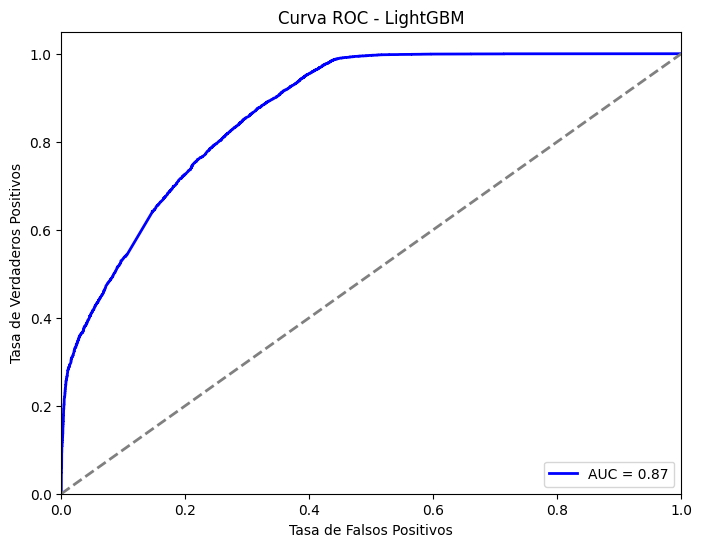

In [25]:
# Curva ROC
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de la clase positiva
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

# Calcular FPR, TPR y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - LightGBM')
plt.legend(loc='lower right')
plt.show()




### **Análisis de Resultados del Modelo de Detección de Noticias Falsas**
La evaluación del modelo construido para la detección de noticias falsas en el contexto político muestra un desempeño aceptable con ciertas limitaciones. La matriz de confusión indica una alta tasa de verdaderos positivos, lo que sugiere que el modelo identifica correctamente muchas noticias falsas. Sin embargo, la presencia de un número elevado de falsos positivos significa que el modelo clasifica algunas noticias verídicas como falsas, lo que podría afectar su confiabilidad y generar desinformación en el usuario final.

Por otro lado, la curva ROC del modelo arroja un área bajo la curva (AUC) de **0.87**, lo que indica un buen equilibrio entre sensibilidad y especificidad. Esto sugiere que el modelo es efectivo en distinguir entre noticias reales y falsas, aunque no es completamente preciso. Un AUC de 1 representaría un modelo perfecto, mientras que un valor de 0.5 indicaría un modelo que no realiza mejor clasificación que el azar.

### **Implicaciones en el Proyecto**
Dado que este modelo tiene aplicación en la detección de noticias falsas, los falsos positivos podrían generar riesgos como la censura de contenido legítimo o la desconfianza en medios de comunicación legítimos. Por lo tanto, sería recomendable explorar estrategias para mejorar la precisión del modelo, como el ajuste del umbral de clasificación, la inclusión de nuevas características en la ingeniería de datos o el uso de técnicas de calibración de probabilidad.

En términos de implementación práctica dentro del proyecto, se debe considerar el impacto de estos resultados en la toma de decisiones del usuario final. Un modelo con sesgo hacia la detección de falsos positivos puede inducir a errores en la interpretación de la información y afectar la confianza en el sistema. Por lo tanto, es fundamental complementar esta solución con explicaciones interpretables sobre cómo se clasifican las noticias y permitir al usuario verificar fuentes antes de tomar decisiones basadas en el modelo.


## Modelo Vectorización TF-IDF + modelo Multinomial Naive Bayes- Daniel

### Generación de Datos
Se utilizó el dataset preprocesado, tomando la columna words1 como texto y Label como variable objetivo. Los datos se dividieron en conjuntos de entrenamiento y prueba (70%-30%) mediante train_test_split.

### Definición del Modelo
Se empleó el algoritmo Multinomial Naive Bayes (MultinomialNB) debido a su eficiencia en clasificación de textos. Se integró en un pipeline con TfidfVectorizer, configurado para capturar unigramas y bigramas (rango (1, 2)) y limitar las características a 5000.

### Optimización de Hiperparámetros
Se realizó una búsqueda de hiperparámetros con GridSearchCV, evaluando alpha en [0.1, 0.5, 1.0] y fit_prior en [True, False], utilizando validación cruzada de 5 particiones.

### Entrenamiento del Modelo
El mejor modelo seleccionado se entrenó utilizando los datos de entrenamiento mediante el método fit del pipeline.

### Selección del Mejor Modelo
Se seleccionó el modelo con el mayor F1-Score, garantizando un equilibrio entre precisión y recall.

### Evaluación del Modelo
El desempeño se evaluó con los datos de prueba mediante las métricas Accuracy, Precision, Recall y F1-Score, obtenidas con accuracy_score y classification_report. La matriz de confusión mostró la proporción de predicciones correctas e incorrectas.


In [31]:
X = df_t['words1']
y = df['Label']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
pipeline = Pipeline([ ('tfidf', TfidfVectorizer( max_features=5000, ngram_range=(1, 2) )), ('clf', MultinomialNB()) ])
pipeline.fit(X_train, y_train)

AttributeError: 'list' object has no attribute 'lower'

In [31]:
y_pred = pipeline.predict(X_test)

In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.786845025994509
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.55      0.68      7171
           1       0.75      0.96      0.84      9948

    accuracy                           0.79     17119
   macro avg       0.83      0.75      0.76     17119
weighted avg       0.81      0.79      0.77     17119



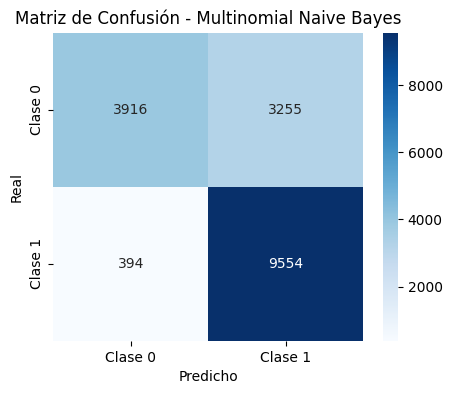

In [33]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Multinomial Naive Bayes")
plt.show()


In [35]:
# Importar librerías necesarias
import pandas as pd
import pickle
from datetime import datetime
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Descargar recursos necesarios de NLTK
nltk.download("punkt")
nltk.download("stopwords")

# ---------------------------------------
# 1. Cargar el Modelo Entrenado
# ---------------------------------------
with open("modelo_multinomial_nb.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# ---------------------------------------
# 2. Cargar los Datos de Prueba
# ---------------------------------------
df_test = pd.read_csv("fake_news_spanish.csv", sep=";")
print("Columnas en el archivo CSV:", df_test.columns.tolist())

# ---------------------------------------
# 3. Funciones de Preprocesamiento (Similares a las del PDF)
# ---------------------------------------
def limpiar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'\d+', '', texto)  # Eliminar números
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar puntuación
    tokens = word_tokenize(texto)  # Tokenizar el texto
    tokens = [palabra for palabra in tokens if palabra not in stopwords.words('spanish')]  # Eliminar stopwords
    return ' '.join(tokens)  # Unir tokens en una cadena de texto

# ---------------------------------------
# 4. Aplicar Preprocesamiento a la Columna de Descripción
# ---------------------------------------
df_test["processed_text"] = df_test["Descripcion"].astype(str).apply(limpiar_texto)

# ---------------------------------------
# 5. Realizar Predicciones
# ---------------------------------------
X_test = df_test["processed_text"]
df_test["Etiqueta Predicha"] = loaded_model.predict(X_test)

# ---------------------------------------
# 6. Exportar los Resultados
# ---------------------------------------
# Crear un nombre único para el archivo de salida
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"fake_news_spanish_pred_{timestamp}.csv"

# Guardar el archivo con las predicciones
df_test.to_csv(filename, sep=";", index=False)
print(f"Archivo generado correctamente: {filename}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Columnas en el archivo CSV: ['ID', 'Label', 'Titulo', 'Descripcion', 'Fecha']
Archivo generado correctamente: fake_news_spanish_pred_20250223_002630.csv


### **Random Forest Julian**

### **Implementación del modelo de clasificación**  

Para esta implementación, utilicé **Random Forest**, un método de ensamble basado en múltiples árboles de decisión que ofrece robustez contra el sobreajuste y una gran capacidad para manejar datos no estructurados. Random Forest es especialmente útil para tareas de clasificación en texto debido a su capacidad para capturar relaciones no lineales en los datos.  

### **Generación de datos**  
El conjunto de datos utilizado corresponde a noticias en español, con una columna de texto (`Descripcion`) y una columna de etiquetas (`Label`). Antes de entrenar el modelo, realicé un preprocesamiento del texto que incluyó:  
- Conversión a minúsculas  
- Eliminación de números y puntuación  
- Tokenización  
- Eliminación de stopwords  

Esto permitió generar un conjunto de datos más limpio y eficiente para el entrenamiento.  

### **Definición del modelo**  
El modelo implementado consiste en un **Random Forest Classifier** dentro de un **pipeline** que incluye:  
1. **Vectorización TF-IDF**: Representa el texto numéricamente, priorizando términos distintivos en los documentos.  
2. **Random Forest**: Modelo de ensamble con 200 árboles, optimizado para paralelización con `n_jobs=-1`.  

### **Entrenamiento del modelo**  
Dividí el conjunto de datos en **entrenamiento (70%) y prueba (30%)** utilizando una partición estratificada (`stratify=y`) para asegurar que ambas clases estuvieran equilibradas en cada subconjunto. Posteriormente, entrené el pipeline con los datos de entrenamiento.  

### **Evaluación del modelo**  
Para evaluar el desempeño del clasificador, utilicé:  
- **Precisión global**: Métrica principal basada en la proporción de predicciones correctas.  
- **Reporte de clasificación**: Incluye precisión, recall y F1-score para cada clase.  
- **Matriz de confusión**: Visualización de errores de clasificación mediante un mapa de calor.  

### **Guardado y despliegue del modelo**  
El modelo entrenado se guardó en un archivo `modelo_random_forest.pkl` mediante la biblioteca `pickle`, permitiendo su reutilización sin necesidad de reentrenamiento. Posteriormente, se cargó el modelo y se realizaron predicciones sobre nuevos datos, generando un archivo con las etiquetas predichas en tiempo real.  

Este enfoque proporciona un sistema eficiente y escalable para la clasificación automática de noticias en español, permitiendo evaluar con precisión la veracidad de la información mediante aprendizaje automático.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Julian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Julian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Columnas en el archivo CSV: ['ID', 'Label', 'Titulo', 'Descripcion', 'Fecha']
Accuracy: 0.7154039371458614
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.57      0.63      7172
           1       0.73      0.82      0.77      9947

    accuracy                           0.72     17119
   macro avg       0.71      0.70      0.70     17119
weighted avg       0.71      0.72      0.71     17119



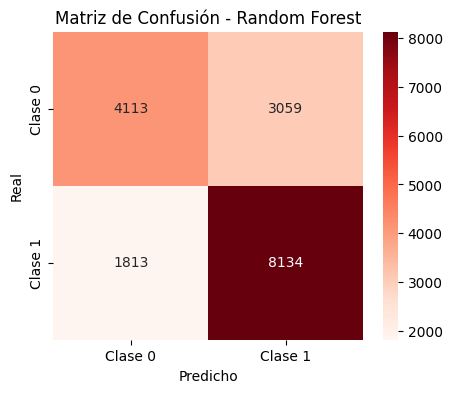

Archivo generado correctamente: fake_news_spanish_pred_rf_20250326_235159.csv


In [34]:

import pandas as pd
import pickle
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Descargar recursos necesarios de NLTK
nltk.download("punkt")
nltk.download("stopwords")

# ---------------------------------------
# 1. Cargar los Datos
# ---------------------------------------
df = pd.read_csv("fake_news_spanish.csv", sep=";")
print("Columnas en el archivo CSV:", df.columns.tolist())

# ---------------------------------------
# 2. Funciones de Preprocesamiento
# ---------------------------------------
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'\d+', '', texto)
    texto = re.sub(r'[^\w\s]', '', texto)
    tokens = word_tokenize(texto)
    tokens = [palabra for palabra in tokens if palabra not in stopwords.words('spanish')]
    return ' '.join(tokens)

df["processed_text"] = df["Descripcion"].astype(str).apply(limpiar_texto)

# ---------------------------------------
# 3. Dividir los Datos en Entrenamiento y Prueba
# ---------------------------------------
X = df['processed_text']
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ---------------------------------------
# 4. Crear el Pipeline con Random Forest
# ---------------------------------------
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))
])

# ---------------------------------------
# 5. Entrenar el Modelo
# ---------------------------------------
pipeline.fit(X_train, y_train)

# ---------------------------------------
# 6. Realizar Predicciones
# ---------------------------------------
y_pred = pipeline.predict(X_test)

# ---------------------------------------
# 7. Evaluar el Modelo
# ---------------------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

# ---------------------------------------
# 8. Guardar el Modelo Entrenado
# ---------------------------------------
with open("modelo_random_forest.pkl", "wb") as file:
    pickle.dump(pipeline, file)

# ---------------------------------------
# 9. Cargar el Modelo y Realizar Predicciones en Nuevos Datos
# ---------------------------------------
with open("modelo_random_forest.pkl", "rb") as file:
    loaded_model = pickle.load(file)

df_test = pd.read_csv("fake_news_spanish.csv", sep=";")
df_test["processed_text"] = df_test["Descripcion"].astype(str).apply(limpiar_texto)

X_test_new = df_test["processed_text"]
df_test["Etiqueta Predicha"] = loaded_model.predict(X_test_new)

# Exportar los resultados
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"fake_news_spanish_pred_rf_{timestamp}.csv"
df_test.to_csv(filename, sep=";", index=False)
print(f"Archivo generado correctamente: {filename}")


### **Comparación de Modelos para la Detección de Noticias Falsas**  

Para evaluar el rendimiento de diferentes enfoques en la detección de noticias falsas en español, probé tres modelos de clasificación: **LightGBM**, **Multinomial Naive Bayes con TF-IDF**, y **Random Forest**. Los resultados muestran que **LightGBM es el modelo con mejor desempeño**, seguido de Naive Bayes, mientras que Random Forest obtuvo los peores resultados.

### **Resultados de los Modelos**  

#### **1. LightGBM (Mejor modelo)**  
- **Accuracy**: *0.8077*  
- **F1-score clase 1 (Noticias falsas)**: *0.85*  
- **F1-score clase 0 (Noticias reales)**: *0.72*  

LightGBM logró la mejor precisión y equilibrio entre precisión y recall. Su capacidad para manejar datos desequilibrados y su optimización para conjuntos de datos grandes permitieron detectar mejor las noticias falsas sin perder demasiada capacidad en la clasificación de noticias reales.  

#### **2. Multinomial Naive Bayes con TF-IDF**  
- **Accuracy**: *0.7868*  
- **F1-score clase 1 (Noticias falsas)**: *0.84*  
- **F1-score clase 0 (Noticias reales)**: *0.68*  

El modelo basado en Naive Bayes tuvo un desempeño cercano a LightGBM, especialmente en la clasificación de noticias falsas. Sin embargo, su capacidad para identificar noticias reales fue menor, con un recall del *55%* en la clase 0, lo que indica que muchas noticias reales fueron clasificadas incorrectamente como falsas.  

#### **3. Random Forest (Peor desempeño)**  
- **Accuracy**: *0.7149*  
- **F1-score clase 1 (Noticias falsas)**: *0.77*  
- **F1-score clase 0 (Noticias reales)**: *0.63*  

Random Forest mostró un rendimiento inferior en comparación con los otros modelos. Aunque tuvo un recall aceptable para detectar noticias falsas (*82%*), su precisión fue menor y tuvo más errores al clasificar noticias reales, lo que lo hace menos confiable para esta tarea.  

### **Conclusiones**  

1. **LightGBM es la mejor opción para la detección de noticias falsas**, ya que ofrece el mejor equilibrio entre precisión y recall en ambas clases. Su capacidad para manejar datos desequilibrados y entrenarse rápidamente lo hacen ideal para problemas de clasificación en grandes volúmenes de texto.  
2. **Naive Bayes con TF-IDF sigue siendo una opción competitiva**, especialmente cuando se busca un modelo más simple y rápido, aunque tiene una mayor tasa de falsos positivos.  
3. **Random Forest no es adecuado para este problema**, ya que presenta el peor desempeño general, con menor precisión en la clasificación de ambas clases y una alta tasa de error en la detección de noticias reales.  

Estos resultados sugieren que el uso de modelos avanzados como LightGBM es clave en la lucha contra la desinformación, permitiendo detectar noticias falsas con mayor precisión y reduciendo el impacto de información errónea en la sociedad.

## Etapa 2

### Instalar FastApi 

In [1]:
!pip install fastapi uvicorn nest_asyncio

You should consider upgrading via the 'C:\Users\Julian\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


### Limpieza de datos
Se vuelve a realizar la limpieza del texto

In [6]:
import re
import unicodedata
import inflect
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download("punkt")
nltk.download("stopwords")

p = inflect.engine()

def remove_non_ascii(words):
    return [unicodedata.normalize('NFKD', w).encode('ascii', 'ignore').decode('utf-8', 'ignore') for w in words if w is not None]

def to_lowercase(words):
    return [w.lower() for w in words if w is not None]

def replace_numbers(words):
    return [p.number_to_words(w) if w.isdigit() else w for w in words]

def remove_punctuation(words):
    return [re.sub(r'[^\w\s]', '', w) for w in words if re.sub(r'[^\w\s]', '', w) != '']

def remove_stopwords(words):
    return [w for w in words if w not in stopwords.words('spanish')]

def processing(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    return words

def limpiar_texto(texto):
    tokens = word_tokenize(str(texto))
    tokens_limpios = processing(tokens)
    return ' '.join(tokens_limpios)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Julian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Julian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Implementación de fast API

Se realizó una API REST utilizando FastAPI, con el propósito de automatizar el uso de los modelos realizados en la etapa anterior para detectar las noticias falsas que fue entrenado previamente. Este enfoque permite que un usuario externo pueda interactuar con el modelo mediante peticiones HTTP como post para realizar predicciones o reentrenamientos con nuevos datos, para esto se cargó el modelo entrenado almacenado como un archivo .pkl y se encapsulo dentro de un servicio accesible en tiempo real. En este caso se escogio el modelo de random forest.

La API cuenta con dos endpoints, el primero permite realizar predicciones sobre uno o varios textos que el usuario desea analizar. Este endpoint recibe como parametros una lista de textos en formato JSON, los procesa mediante una función que limpieza y posteriormente los transforma con el pipeline ya entrenado. Luego, el modelo genera la predicción si es una noticia falsa o no lo es.

El segundo endpoint, fue diseñado para permitir el reentreno dinámico del modelo. Este recibe tanto los textos como sus etiquetas verdaderas, realiza la limpieza y entrena nuevamente el modelo con estos datos. Este endpoint permite que el modelo este actualizado. De igual forma, se actuliza el archivo del modelo .pkl y se genera las metricas de desempeño que se imprimen.

Además, se utilizaron herramientas como nest_asynio para permitir que el servidor de FastAPI se ejecte dentro del entorno de jupyter notebook.

In [7]:
import pickle
import pandas as pd
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List
import nest_asyncio
import uvicorn
from sklearn.metrics import classification_report

# Cargar modelo (Random Forest, LightGBM o el que hayas elegido)
with open("modelo_lightgbm.pkl", "rb") as file:
    model = pickle.load(file)

# Inicializar FastAPI
app = FastAPI(title="Detector de Noticias Falsas - Etapa 2")

# Definir entradas
class EntradaTexto(BaseModel):
    textos: List[str]

class DatosEntrenamiento(BaseModel):
    textos: List[str]
    etiquetas: List[int]

@app.post("/predict")
def predecir(input_data: EntradaTexto):
    textos_limpios = [limpiar_texto(t) for t in input_data.textos]
    predicciones = model.predict(textos_limpios)
    probabilidades = model.predict_proba(textos_limpios).tolist()
    return {
        "predicciones": predicciones.tolist(),
        "probabilidades": probabilidades
    }

@app.post("/retrain")
def reentrenar(data: DatosEntrenamiento):
    textos_limpios = [limpiar_texto(t) for t in data.textos]
    X = textos_limpios
    y = data.etiquetas

    model.fit(X, y)

    # Guardar nueva versión del modelo
    with open("modelo_random_forest.pkl", "wb") as file:
        pickle.dump(model, file)

    # Evaluar en mismo set por simplicidad (puedes dividir en train/test también)
    y_pred = model.predict(X)
    reporte = classification_report(y, y_pred, output_dict=True)
    return {
        "mensaje": "Modelo reentrenado exitosamente.",
        "metricas": reporte
    }


In [8]:
nest_asyncio.apply()
uvicorn.run(app, host="127.0.0.1", port=8000)

INFO:     Started server process [12320]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:59505 - "GET / HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:59506 - "GET / HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:59506 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:59506 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:59508 - "POST /predict HTTP/1.1" 200 OK


c:\Users\Julian\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [12320]
